In [2]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
import pandas as pd
import numpy as np
import math
import json
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# What Influences The Success of Starbucks App Promotions?

## INTRODUCTION

Starbucks Corporation, the most popular coffee chain in the world, has an estimated revenue of over $26.5 billion (2019) and around 33,833 store locations in 70 countries (2021). Since the opening of the first Starbucks in 1971, its growth over the last 50 years clearly shows its success in fulfilling its mission to *"inspire and nurture the human spirit - one person, one cup, and one neighbourhood at a time."* [Starbucks Marketing Strategy](https://www.studysmarter.co.uk/explanations/business-studies/business-case-studies/starbucks-marketing-strategy/)

The success of Starbucks stems from its efficient use of its marketing mix, delivering the right product with the right price at the right place with the reinforcement of the right promotions delivered across various channels. 

Starbucks is well-known for offering the right product due to its very uniform quality of food, beverage, and service. Enter any Starbucks establishment and you will always get what you expect from this trademark brand. This is probably one of the reasons behind its ability to foster long-term customer relationships and patronage. 

In addition to the appeal of consistency, Starbucks is able to add a dose of uniqueness in the design of its store across different locations, like the Starbucks branch in Japan that resembles a traditional tea house or the one in Bangkok that resembles a Thai farmhouse. Aside from these cultural adaptations, Starbucks has a pricing system that draws in their target demographic in each country. 

Starbucks has a very strong promotion strategy that do not only include traditional channels like billboards, newspapers, and magazines. It believes in using the word of mouth and the power of Instagram by encouraging its customers to post pictures of their products witht he promise of rewards. It also encourages customer loyalty and purchases through the launch of Starbucks Rewards. Coupled with a mobile app that provides recommendations based on purchase history and a convenient "order and pay" system that allows customers to pay in advance before picking up their beverage, it is no wonder that Starbucks has captured a following of this magnitude.

Due to its intriguing success, the Starbucks Reward system has been chosen as a project for the Udacity Nanodegree in Machine Learning Engineering Capstone Project. The data provided for this project simulates the offers sent out to the users of its mobile app as well as their response to these offers. 

In the simulation, Starbucks sends out an offer to its users. This can be an informational advertisement about a new drink or product or an actual offer that allows the user to redeem a discount or a BOGO (a buy one get one free) promotion after purchasing a minimum amount within a set duration.

The objective of the study is to track patterns in customer response based on their demographic in order to optimise the distribution of Starbucks promotions by using completed orders as the metric of success. Although it may seem straightforward, there is a degree of challenge in finding out whether the customer was actually aware of the promotion during the completion of the promotion. It is quite possible that the  customer has reached the target amount within the prescribed duration without even viewing the offer. In this case, the promotion cannot be classified as successful in encouraging customer purchase as the customer would have made the same transaction without the reinforcement of this promotion.

## DOMAIN BACKGROUND

Consumer behaviour, an important aspect of marketing, is the study of an individual's buying habits and response to products that allow businesses to find gaps in the market that they can use to innovate or incorporate to their business models. It involves looking into the the psychological, personal, and social factors that affect customer behaviour.

In this project, the aim is to define factors that affect a customer's response to the Starbucks promotions generated on their mobile applications. The consumer behaviour model that will be considered here is a black-box model which will be based on the customer's external-stimulus response, wherein we will be looking into the informational messages, promotions, price, and the channels by which the advertisement was sent to find out how the customer will respond to the offer. We will also be looking into the personal factors that affect this behaviour by looking into the affects of age, gender, and income to the outcome. 

## PROBLEM STATEMENT

In the simulation of the Starbucks rewards mobile app used in this project, the user is sent an offer once every few days. This offer can be an advertisement for a drink or an actual offer that could either be a discount or a BOGO (buy one get one free). Not all users receive the same offer and some users may not receive an offer during certain weeks. 

Each offer comes with a minimum spend that entitles the user to the discount as well as a validity period before the offer expires. By combining transactinal data and user demographic, the aim of this machine learning project is to create a model that predicts whether the user wil be converted by the offer or promotion. It also aims to identify the important factors that influence the result. 

As it is possible for the user to complete the minimum requirement to avail of the promotion without viewing the offer, the challenge is to separate the users who have viewd the promotion before completing it and those who have not. The reason for this is that the main aim of this project is to see how the offer influences the user. 

## DATASETS AND INPUTS

The datasets used for this project consist of offer details, customer demographic and transactional data|. Each of these datasets are contained in a json file. A description and example of each dataset can be found below. 

### porfolio.json

The dataset contains offer ids and metadata about each offer.

* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings) - identifies the channel/channels where the offer was sent (email, social, mobile, web)

In [4]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


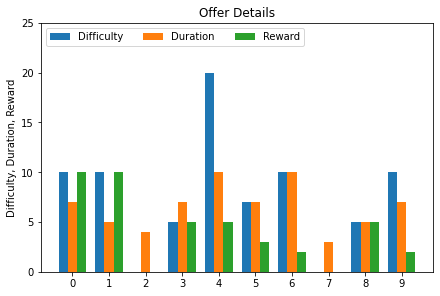

In [7]:
offers = tuple(list(portfolio.index))
offer_details = {
    'Difficulty': list(portfolio['difficulty']),
    'Duration': list(portfolio['duration']),
    'Reward': list(portfolio['reward']),
}
x_labels = offers

x = np.arange(len(offers))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(constrained_layout=True)

for attribute, measurement in offer_details.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Difficulty, Duration, Reward')
ax.set_title('Offer Details')
ax.set_xticks(x + width)
ax.set_xticklabels(x_labels)
ax.legend(loc='upper left', ncol=3)
ax.set_ylim(0, 25)

plt.show()

The bar graph shows the levels of difficulty, duration, and reward for each offer. As the informational promotions merely contain advertisements that do not result to app rewards, they do not have values for difficulty or reward.

A comparison of the duration between BOGO and discount offers is that BOGO offers tend to have a lower difficulty level and duration compared to discount offers. Informational offers seem to have the lowest duration of validity.

One notable feature demonstrated by this graph is that the reward difficulty, reward, and duration levels are not usually proportional to each other. The offer in index 4, for example, requires a minimum spend of 20 but only entitles the user to a discount of 4. The user, however, has more time to avail of this offer compared to the offer in index 1 wherein the user redeems a reward of the same value as the minimum spend.

These details bring about the questions:
* Which qualities influence the user to complete an offer?
* Which of these offers lead to a high transaction amount?
* Which channels would lead to more offer completions?

### profile.json

The dataset contains details on the customer's demographic.

* age (int) - age of the customer
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

In [8]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


One glance at the user profile shows that it has some NaN values. Another value worth looking into would be the maximum age of the users. It is unlikely to have a user of age 118 as the oldest known living person is a 115-year-old woman in Spain. Convenienly, the users who are 118 years of age have NaN values in their income. 

<AxesSubplot:title={'center':'Gender of Starbucks Customers'}, ylabel='gender'>

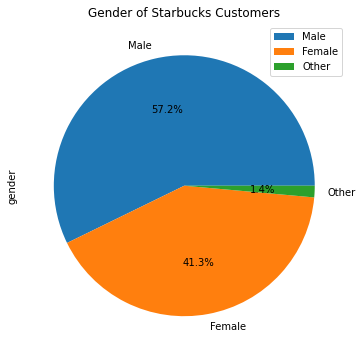

In [9]:
profile['gender'].value_counts().plot.pie(legend = True, 
                                             labels = ['Male', 'Female', 'Other'], 
                                             figsize=(11, 6),
                                             title = 'Gender of Starbucks Customers',
                                             autopct='%1.1f%%'
                                            )

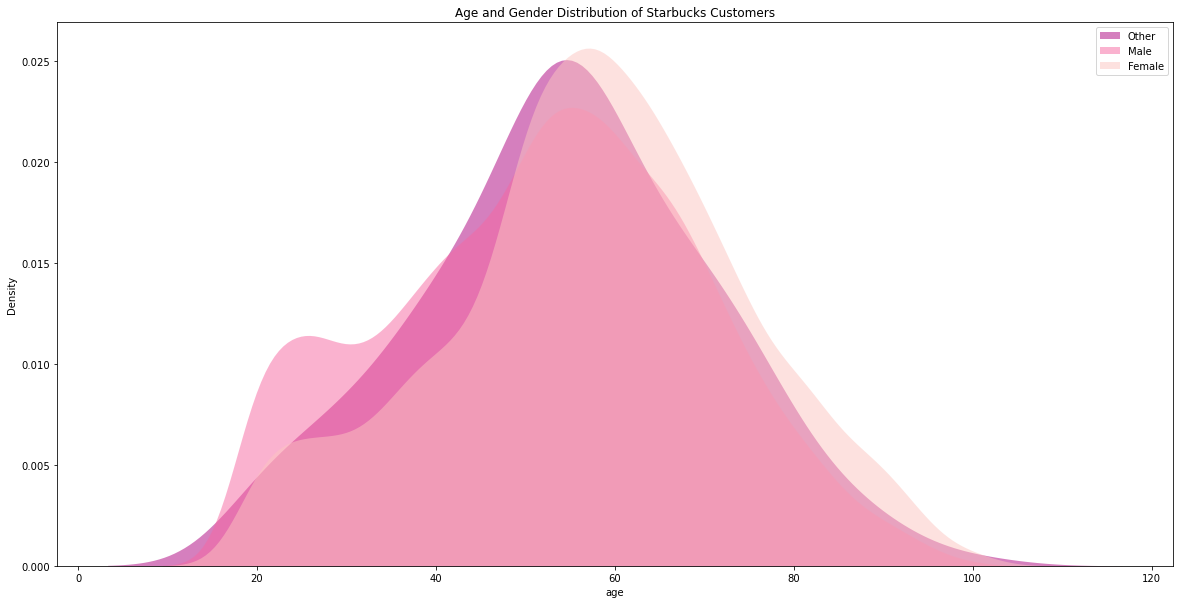

In [11]:
plt.figure(figsize=(20,10))
sns.kdeplot(
    data=profile, 
    x="age", 
    hue="gender",
    fill=True, 
    common_norm=False, 
    palette="RdPu",
    alpha=.5, 
    linewidth=0,
)
plt.legend(labels=['Other', 'Male', 'Female'])
plt.title('Age and Gender Distribution of Starbucks Customers')
plt.show()

The pie chart shows that the app has more male users than female users. Based on the age distribution, it can be seen that there are more younger male users and more older female users. Another thing worth noting is that most users are between 50 to 70 years of age.

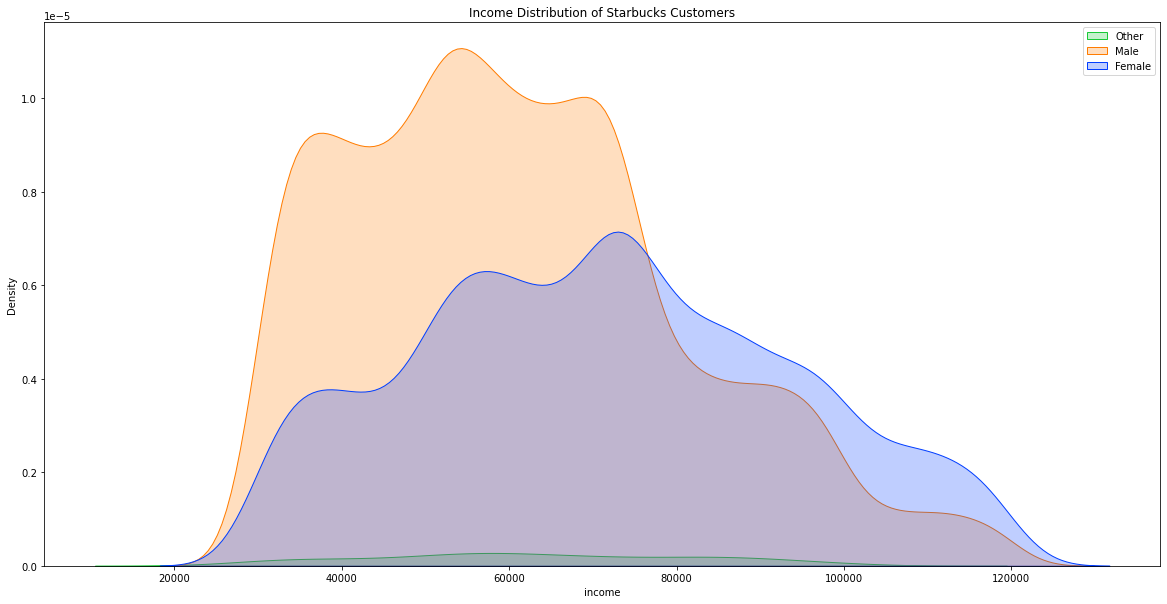

In [12]:
plt.figure(figsize=(20,10))
sns.kdeplot(
    data=profile, 
    x="income", 
    hue="gender",
    fill = True,
    palette="bright"
)
plt.legend(labels=['Other', 'Male', 'Female'])
plt.title('Income Distribution of Starbucks Customers')
plt.show()

Although the Starbucks app has less female users, it is quite noticeable that the female users have a higher income than the male users. This is probably because the population of female users tend to be older and would ideally have more established careers and more highly paid roles.

One question that should be asked here is whether or not age, income, and gender would play a crucial role in the completion of an offer. It is also worth looking at the contribution of member duration which will later on be feature-engineered using the "became_member_on" column.

### transcript.json
This dataset contains customer transactions and defines when the customer receives, views, and completes the offer. 

* event (str) - record description (transaction, offer received, offer viewed, offer completed)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - consists of an offer id for offer received and viewed, an offer id and reward for offer completed, and the amount spent for transactions.  

In [9]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


<AxesSubplot:>

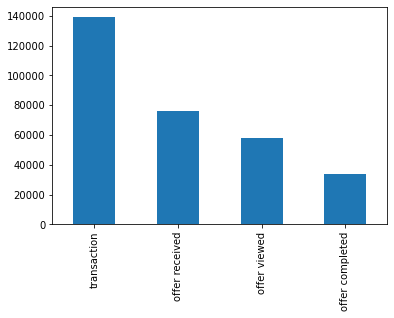

In [17]:
transcript.event.value_counts().plot(kind = 'bar')

As most of the information is contained within the value dictionary, it is necessary to extract the data and feature engineer columns that would allow the study of the result of each offer. 

Looking at the graph of events above, however, shows that class imbalance can be anticipated in this dataset.

## SOLUTION STATEMENT
To predict the desired outcome, the completion of an offer, and to find the important features that would lead to this result, ensemble methods in the form of decision trees, random forest, XGBoost, and LGBM. Before using these algorithms to predict the outcome, the dataframes will need to undergo some restructuring in the form of feature engineering and merging. 

## BENCHMARK MODEL

Decision trees will be used as a benchmark model as it is is the simplest among all ensembles. The result and feature importances derived from the decision tree will then be compared with the other models. 

## EVALUATION METRICS

The F1 Score, which provides the harmonic balance between precision and recall and is better suited to datasets that have class imbalance, will be one of the metrics used to evaluate the model. As we are also interested in the probability that the user will be redeeming the offer, another metric that will be used is the AUC.

## THE PROJECT DESIGN

1. Dataset Cleaning. The first step will involve removing all the NaN values and the age values of 118 that are present in the profile dataset.

2. Feature Engineering. This will involve: (1) Creating *transaction, received, viewed, completed* columns in the transcript dataframe, (2) Creating columns for *offer id, amount, reward* in the transcript dataframe, (3) Creating *web, email, social, mobile* columns in the portfolio dataframe, (4) Creating a column that shows the duration of membership by finding the difference between each datetime object and the date of the most recent member.

3. Table Merging. Merge the tables using the offer id and person id as keys. 

4. Preprocessing. Encode the categorical variables in preparation for the model. 

5. Explore the dataset to find correlations and other important features.

6. Split the dataset ino train, test, and validation sets. 

7. Use the benchmark model for the train data. 

8. Get the F1 Score and AUC of the benchmark model as well as the important features generated by the model.

9. Use Grid Search CV to find the model with the best performance among Random Forest, XGBoost, LGBMClassifier.

10. Use Random Search CV on the validation data to tune the hyperparameters of the best model. 

## REFERENCE:

* Fontanella, C. (2022, August 18). [A beginner's Guide to Customer Behavior Analysis. HubSpot Blog.](https://blog.hubspot.com/service/customer-behavior-analysis#:~:text=Customer%20behavior%20refers%20to%20an,enticing%20products%20and%20service%20offers) Retrieved February 26, 2023. 
* [Starbucks Marketing Strategy.]( https://www.studysmarter.co.uk/explanations/business-studies/business-case-studies/starbucks-marketing-strategy/) (n.d.). StudySmarter UK. Retrieved 27 February 2023.
* [The 10 Largest Coffee Companies In The World – Zippia.](https://www.zippia.com/advice/largest-coffee-companies/) (2022, September 14). Retrived 27 February 2023. 
* [What is Consumer Research? on JSTOR.](https://www.jstor.org/stable/2489249) (n.d.). Retrieved 28 February 2023
* [What Is Consumer Behavior in Marketing? - Factors, Model & Definition.](https://study.com/academy/lesson/what-is-consumer-behavior-in-marketing-factors-model-definition.html) (n.d.). study.com. Retrieved February 28, 2023.
* [LightGBM Classifier](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)
* [Decision Tree Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
* [Random Forest Classifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
* [XGBoost Classifier](https://xgboost.readthedocs.io/en/stable/parameter.html)